<a href="https://colab.research.google.com/github/ThaiNguyenLongHai/Hai/blob/main/ProjectCuoiKi_ThaiNguyenLongHai_EmotionDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.6/349.6 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 47.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 65.7 MB/s eta 0:00:00
  Created wheel for nltk: filename=nltk-3.2.4-py3-none-any.whl size=1367708 sha256=023148a146faa6a0ef1daade26b70380a5bb1cfa1811f52abcf9a394b114aba4
  Stored in directory: /root/.cache/pip/wheels/0e/8c/42/bcd0934b61ecf4cef964ccc9881888cca0841ec72266e99de1
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1


In [ ]:
import tensorflow as tf
import matplotlib. pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow. keras.preprocessing import image
from tensorflow.keras import layers
from keras.layers import Dense, Activation, Dropout, BatchNormalization, Flatten
from tensorflow.keras.optimizers import RMSprop 
from keras.models import Sequential
from sklearn.metrics import accuracy_score #Do Luong
from keras.callbacks import EarlyStopping
from keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import load_model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image_generator = ImageDataGenerator(rescale = 1/255, validation_split = 0.2)

train_dataset = image_generator.flow_from_directory(batch_size = 32,
                                                    directory ="/content/drive/MyDrive/Face_Motion/training",
                                                    shuffle = True,
                                                    target_size = (150,150),
                                                    subset = "training",
                                                    class_mode ='categorical')
validation_dataset = image_generator.flow_from_directory(batch_size = 32,
                                                    directory ="/content/drive/MyDrive/Face_Motion/validation",
                                                    shuffle = True,
                                                    target_size = (150,150),
                                                    subset = "validation",
                                                    class_mode ='categorical')
train_dataset.class_indices


Found 8442 images belonging to 5 classes.
Found 1186 images belonging to 5 classes.


{'angry': 0, 'happy': 1, 'neutral': 2, 'sad': 3, 'surprise': 4}

In [ ]:
model = Sequential()
# Group 1
model.add(Conv2D(32,(3,3), padding = 'same', kernel_initializer = 'he_normal', input_shape =(150,150,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2)))

# Group 2
model.add(Conv2D(64,(3,3), padding = 'same', kernel_initializer = 'he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3), padding = 'same', kernel_initializer = 'he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2)))

# Group 3
model.add(Conv2D(128,(3,3), padding = 'same', kernel_initializer = 'he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3), padding = 'same', kernel_initializer = 'he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2)))
# Group 4
model.add(Conv2D(256,(3,3), padding = 'same', kernel_initializer = 'he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3), padding = 'same', kernel_initializer = 'he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2)))


In [ ]:
model.add(Flatten())
# Group 5
model.add(Dense(64,kernel_initializer = 'he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
# Group 6
model.add(Dense(64,kernel_initializer = 'he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Group 7
model.add(Dense(5,kernel_initializer = 'he_normal'))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 activation (Activation)     (None, 150, 150, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 75, 75, 64)        0

In [ ]:
model.compile(loss ='mse', optimizer = RMSprop(), metrics = ['accuracy'])
history = model.fit(train_dataset,batch_size=128, epochs=30,validation_data = validation_dataset)

Epoch 1/30
264/264 [==============================] - 1834s 7s/step - loss: 0.1536 - accuracy: 0.3537 - val_loss: 0.1434 - val_accuracy: 0.4056
Epoch 2/30
264/264 [==============================] - 22s 85ms/step - loss: 0.1243 - accuracy: 0.5000 - val_loss: 0.1331 - val_accuracy: 0.4393
Epoch 3/30
264/264 [==============================] - 21s 79ms/step - loss: 0.1088 - accuracy: 0.5789 - val_loss: 0.1188 - val_accuracy: 0.5295
Epoch 4/30
264/264 [==============================] - 22s 84ms/step - loss: 0.0947 - accuracy: 0.6437 - val_loss: 0.1168 - val_accuracy: 0.5354
Epoch 5/30
264/264 [==============================] - 22s 82ms/step - loss: 0.0825 - accuracy: 0.6996 - val_loss: 0.1166 - val_accuracy: 0.5675
Epoch 6/30
264/264 [==============================] - 22s 82ms/step - loss: 0.0695 - accuracy: 0.7516 - val_loss: 0.1138 - val_accuracy: 0.5877
Epoch 7/30
264/264 [==============================] - 22s 83ms/step - loss: 0.0594 - accuracy: 0.7953 - val_loss: 0.1295 - val_accuracy:

In [ ]:
score = model.evaluate(train_dataset, verbose = 0)
print('Sai So Kiem Tra:', score[0])
print('Do Chinh Xac Kiem Tra:', score[1])


Sai So Kiem Tra: 0.00424488028511405
Do Chinh Xac Kiem Tra: 0.9879175424575806


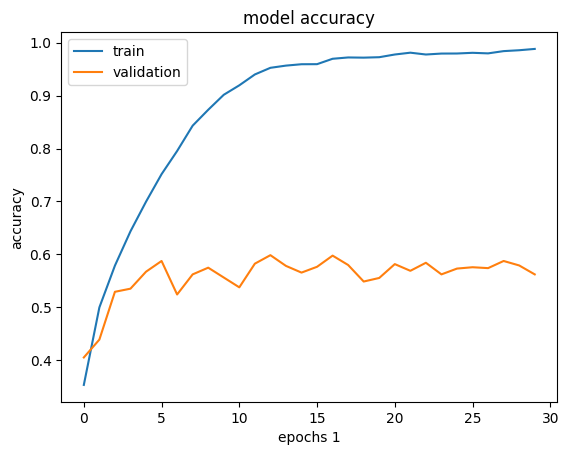

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs 1')
plt.legend(['train','validation'])
plt.show()


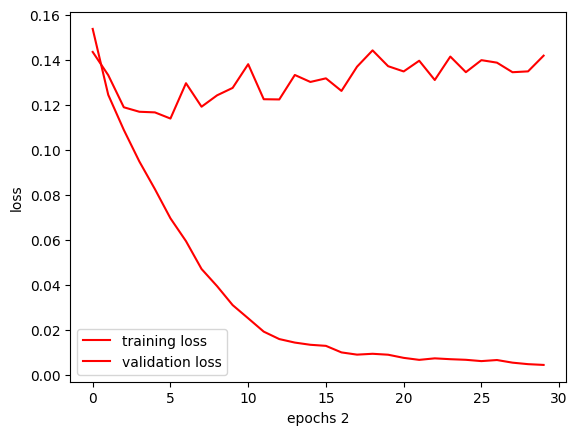

In [ ]:
plt.plot(history.history['loss'], 'r', label ='training loss')
plt.plot(history.history['val_loss'], 'r', label ='validation loss')
plt.xlabel('epochs 2')
plt.ylabel('loss')
plt.legend()
plt.show()


In [ ]:
model.save('Emotion_People.h5')

1/1 [==============================] - 0s 496ms/step


array(['angry'], dtype='<U8')

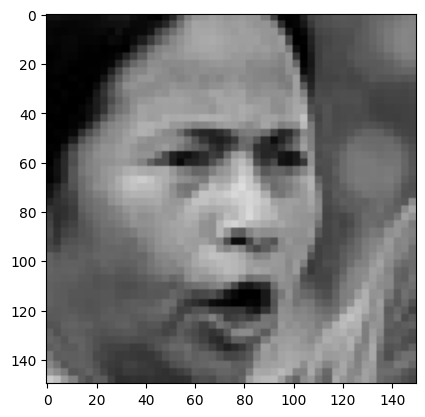

In [ ]:
model_CNN = load_model('Emotion_People.h5')
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "/content/drive/MyDrive/Face_Motion/training/angry/10394.jpg"
predict = ['angry', 'happy', 'neutral', 'sad', 'surprise']
predict = np.array(predict)
img = load_img(filename, target_size =(150,150))
plt.imshow(img)

img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255


result = np.argmax(model_CNN.predict(img), axis = -1)
predict[result]

1/1 [==============================] - 0s 200ms/step


array(['surprise'], dtype='<U8')

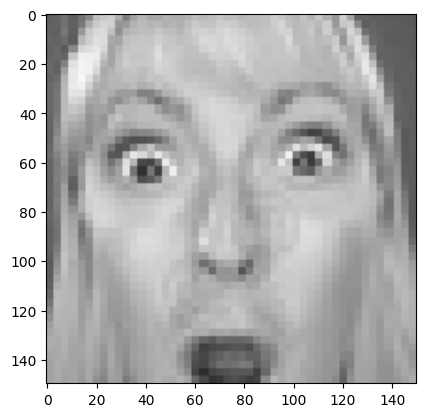

In [ ]:
model_CNN = load_model('Emotion_People.h5')
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "/content/drive/MyDrive/Face_Motion/training/surprise/10282.jpg"
predict = ['angry', 'happy', 'neutral', 'sad', 'surprise']
predict = np.array(predict)
img = load_img(filename, target_size =(150,150))
plt.imshow(img)

img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255


result = np.argmax(model_CNN.predict(img), axis = -1)
predict[result]

1/1 [==============================] - 0s 202ms/step


array(['neutral'], dtype='<U8')

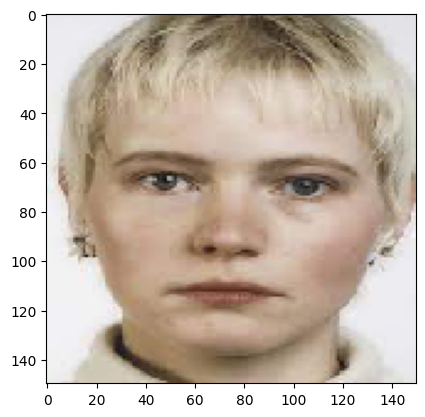

In [ ]:
model_CNN = load_model('Emotion_People.h5')
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "/content/drive/MyDrive/motion_test/neutral_face.jpg"
predict = ['angry', 'happy', 'neutral', 'sad', 'surprise']
predict = np.array(predict)
img = load_img(filename, target_size =(150,150))
plt.imshow(img)

img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255


result = np.argmax(model_CNN.predict(img), axis = -1)
predict[result]

1/1 [==============================] - 0s 204ms/step


array(['happy'], dtype='<U8')

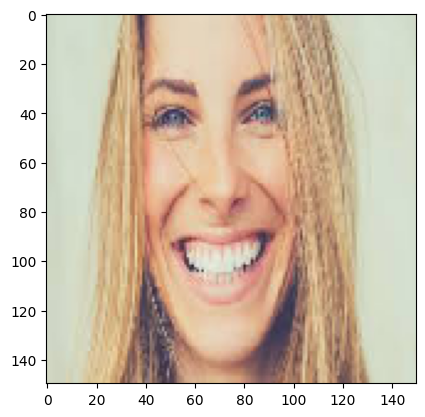

In [ ]:
model_CNN = load_model('Emotion_People.h5')
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "/content/drive/MyDrive/motion_test/images_happy.jpg"
predict = ['angry', 'happy', 'neutral', 'sad', 'surprise']
predict = np.array(predict)
img = load_img(filename, target_size =(150,150))
plt.imshow(img)

img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255


result = np.argmax(model_CNN.predict(img), axis = -1)
predict[result]

1/1 [==============================] - 0s 296ms/step


array(['sad'], dtype='<U8')

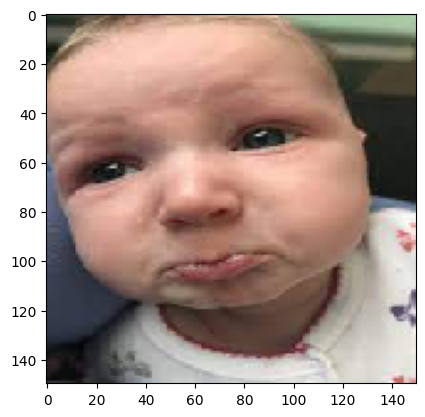

In [ ]:
model_CNN = load_model('Emotion_People.h5')
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "/content/drive/MyDrive/motion_test/images_sad.jpg"
predict = ['angry', 'happy', 'neutral', 'sad', 'surprise']
predict = np.array(predict)
img = load_img(filename, target_size =(150,150))
plt.imshow(img)

img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255


result = np.argmax(model_CNN.predict(img), axis = -1)
predict[result]

1/1 [==============================] - 0s 201ms/step


array(['angry'], dtype='<U8')

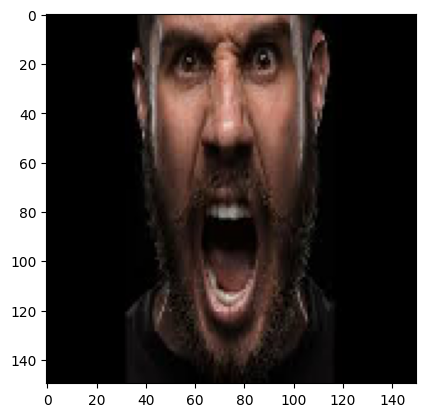

In [ ]:
model_CNN = load_model('Emotion_People.h5')
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "/content/drive/MyDrive/motion_test/angry.jpg"
predict = ['angry', 'happy', 'neutral', 'sad', 'surprise']
predict = np.array(predict)
img = load_img(filename, target_size =(150,150))
plt.imshow(img)

img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255


result = np.argmax(model_CNN.predict(img), axis = -1)
predict[result]